In [1]:
import pandas as pd
from matplotlib.pyplot import figure, savefig, show, subplots
import os
import math
#dfa = pd.read_csv("./gpt3.5-zeroshot.csv", sep=';')
#print(dfa['Original'].value_counts()['1'])

def aux(param):
    if type(param) == str:
        return int(param)
    if math.isnan(param):
        return param
    return int(param)
    

dic = {}
directory = "../"
for file in os.scandir(directory):
    if file.is_file():
        if "csv" in file.name:
            df = pd.read_csv(file.path, sep=';')
            
            df['Original'] = df['Original'].apply(aux)
            
            #filtered_df = df[df['Possible to answer'] == 1]
            
            originals = df['Original'].value_counts()[1]
            print(file.name + ":" + str(originals))
            
            original_percentage = round((originals)*100/len(df), 0)
            
            possibles = df['Possible to answer'].value_counts()[1] 
            
            possibles_percentage = round((len(df)-possibles)*100/len(df), 0)
            #answers = df['Answer'].value_counts()['T']
            
            print(original_percentage)
            print(possibles_percentage)
            dic[file.name[:-4]] = {'Original Sentences': original_percentage, 'Not Possible to Answer': possibles_percentage}


gpt3.5-finetuned.csv:7
7.0
11.0
mistral-zeroshot.csv:45
48.0
17.0
gpt3.5-zeroshot.csv:33
35.0
6.0
mistral-finetuned.csv:16
17.0
26.0
final-model.csv:7
7.0
12.0


{'Original Sentences': [7.0, 48.0, 35.0, 17.0, 7.0]}


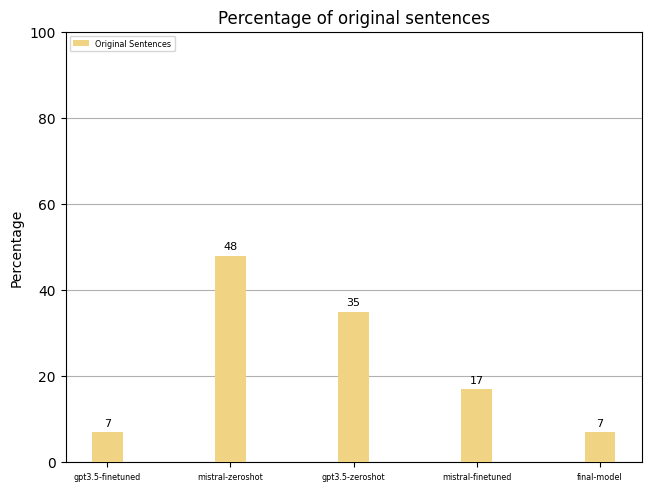

In [2]:
import numpy as np
import matplotlib.pyplot as plt

file_tag = 'originals'
results = {'Original Sentences':[]}
models = []
   
for key in dic:
    models.append(key)
    results['Original Sentences'].append(round(dic[key]['Original Sentences'],2))
print(results)


x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
multiplier = 1
for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = '#f0d484',zorder=3)
    ax.bar_label(rects, padding=3,fontsize=8)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Percentage of original sentences')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 100)
ax.tick_params(axis="x", labelrotation=0, labelsize="xx-small")
ax.grid(zorder=0, axis='y')

savefig(f"/home/eduvedras/tese/model/thesisplots/{file_tag}.png", bbox_inches='tight')
show()

{'Not Possible to Answer': [11.0, 17.0, 6.0, 26.0, 12.0]}


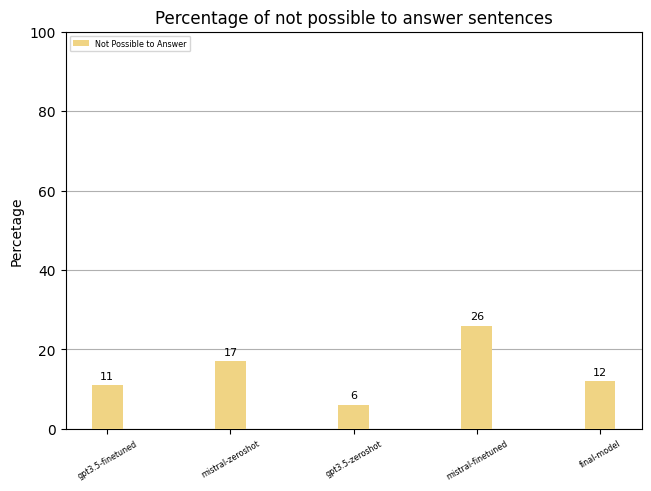

In [7]:
import numpy as np
import matplotlib.pyplot as plt

file_tag = 'possibletoanswer'
results = {'Not Possible to Answer':[]}
models = []
   
for key in dic:
    models.append(key)
    results['Not Possible to Answer'].append(round(dic[key]['Not Possible to Answer'],2))
print(results)


x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
multiplier = 1
for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = '#f0d484', zorder=3)
    ax.bar_label(rects, padding=3,fontsize=8)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percetage')
ax.set_title('Percentage of not possible to answer sentences')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 100)
ax.tick_params(axis="x", labelrotation=0, labelsize="xx-small")
ax.grid(zorder=0, axis='y')

savefig(f"/home/eduvedras/tese/model/thesisplots/{file_tag}.png", bbox_inches='tight')
show()